In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os, sys

In [3]:
sys.path.append('..')

In [4]:
from ers.base import ERS
from ers.models import StoVol

In [5]:
T = 50
alpha=0.95
beta=0.7
sv=0.3
d=1

stovol = StoVol(dimension=d, alpha=alpha, beta=beta, sv=sv)

In [6]:
xtrue=np.zeros((T, d));
xtrue[0,:]=stovol.ss*np.random.randn(d)

y=np.zeros((T, d))
y[0]=beta*np.exp(xtrue[0,0]/2)*np.random.randn(d);
for t in np.arange(1,T):
    xtrue[t]=alpha*xtrue[t-1]+sv*np.random.randn(d)
    y[t]=beta*np.exp(xtrue[t]/2)*np.random.randn(d)

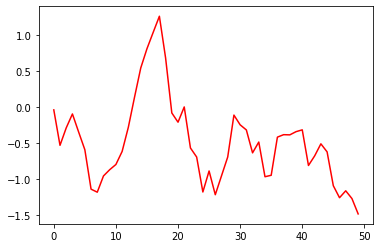

In [7]:
plt.plot(xtrue, color = 'red')

In [10]:
n_samples = 10
acccepted_x, cand_x, n_trial = stovol(n_samples=n_samples, n_particles=2500, T=T, y=y)

 70%|███████   | 7/10 [07:37<03:12, 64.24s/it]

Trial 50


100%|██████████| 10/10 [09:27<00:00, 56.76s/it]


In [11]:
n_samples/ n_trial

0.17543859649122806

In [16]:
average_x = np.mean(acccepted_x, axis=0)

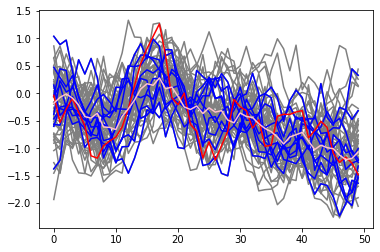

In [18]:
for i in range(cand_x.shape[0]):
    plt.plot(cand_x[i,:,0], color = 'gray')
    
for i in range(acccepted_x.shape[0]):
    plt.plot(acccepted_x[i,:,0], color = 'blue')

plt.plot(xtrue, color = 'red')
plt.plot(average_x, color = 'pink')

In [ ]:
def gen_obs(x):
    y=np.zeros((T, d))
    y[0]=beta*np.exp(x[0,0]/2)*np.random.randn(d);
    for t in np.arange(1,T):
        xtrue[t]=alpha*x[t-1]+sv*np.random.randn(d)
        y[t]=beta*np.exp(x[t]/2)*np.random.randn(d)
    return y

In [ ]:

for i in range(acccepted_x.shape[0]):
    plt.plot(gen_obs(acccepted_x[i,:,:]), color = 'blue')
plt.plot(gen_obs(xtrue), color='red')

In [ ]:

for i in range(acccepted_x.shape[0]):
    plt.plot((acccepted_x[i,:,:]), color = 'blue')
plt.plot((xtrue), color='red')